# RQ1: Can LLM detect bug-fix-related diffs from tangled commits?

In [4]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from modules.Untangler import GeminiUntangler, OpenAIUntangler, FreeUntangler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\Winter 2025\COMP 7890 - Data-driven Software Engineering\Project\Tangled\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv("./data/Complete_GoldSet.csv")

In [6]:
os.makedirs("./Results/RQ1", exist_ok=True)

# Without Commit Message

In [ ]:
save_path = "./Results/RQ1/WithoutMsg/"

## gpt-4o-mini

In [ ]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [00:00, 8251.63it/s]
1776it [06:33,  4.51it/s]


              precision    recall  f1-score   support

       Buggy       0.66      0.86      0.75       900
    NotBuggy       0.79      0.54      0.64       876

    accuracy                           0.70      1776
   macro avg       0.72      0.70      0.69      1776
weighted avg       0.72      0.70      0.69      1776



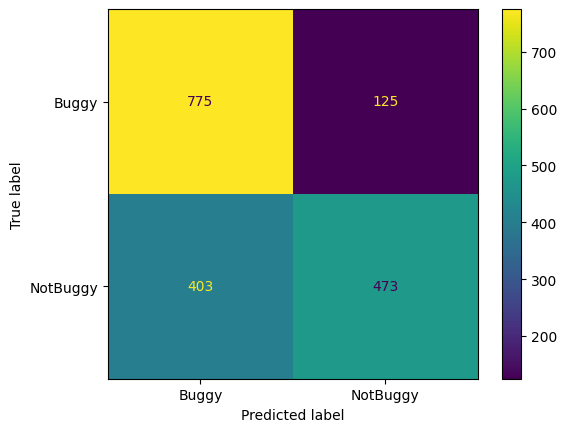

In [ ]:
model_name = "gpt-4o-mini"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))
cm = confusion_matrix(result["Decision"], result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

              precision    recall  f1-score   support

       Buggy       0.62      0.85      0.71       168
    NotBuggy       0.69      0.38      0.49       144

    accuracy                           0.63       312
   macro avg       0.65      0.62      0.60       312
weighted avg       0.65      0.63      0.61       312



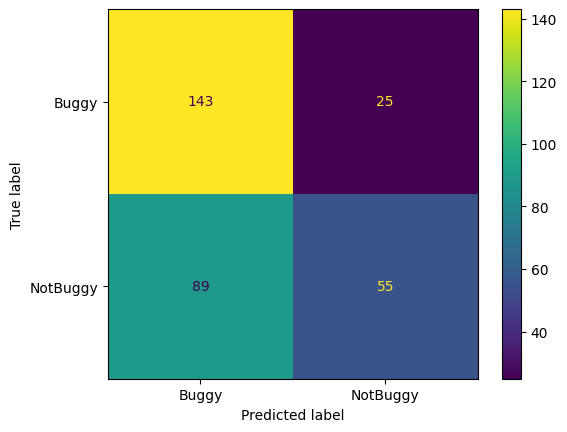

In [21]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
model_name = "gpt-4o"
result = untangler.get_batch_result("batch_67e0d14e6a5c819096e8634178b16522", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
model_name = "gpt-4o"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [ ]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [15:50,  1.87it/s]


In [ ]:
model_name = "gemini-2.0-flash"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.65      0.86      0.74       900
    NotBuggy       0.78      0.52      0.62       876

    accuracy                           0.69      1776
   macro avg       0.71      0.69      0.68      1776
weighted avg       0.71      0.69      0.68      1776



              precision    recall  f1-score   support

       Buggy       0.61      0.76      0.68       168
    NotBuggy       0.61      0.44      0.51       144

    accuracy                           0.61       312
   macro avg       0.61      0.60      0.59       312
weighted avg       0.61      0.61      0.60       312



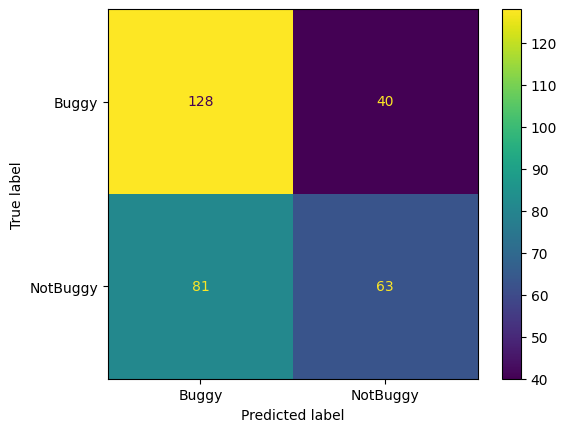

In [13]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## codellama/CodeLlama-7b-hf

In [ ]:
model_name = "microsoft/Phi-3-mini-4k-instruct"
untangler = FreeUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df[:2])
result["Detection"] = result["Detection"].apply(lambda x: x.strip())

model_name = model_name.replace("/","-")
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# With Commit Message

In [25]:
save_path = "./Results/RQ1/WithMsg/"

## gpt-4o-mini

In [ ]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [26]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, True, 0, False)
_, result = untangler.get_batch_result("batch_67e0d76dce348190a7ba8c8c1a2428fb", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

100%|██████████| 1776/1776 [00:00<?, ?it/s]


              precision    recall  f1-score   support

       Buggy       0.76      0.94      0.84       900
    NotBuggy       0.92      0.70      0.80       876

    accuracy                           0.82      1776
   macro avg       0.84      0.82      0.82      1776
weighted avg       0.84      0.82      0.82      1776



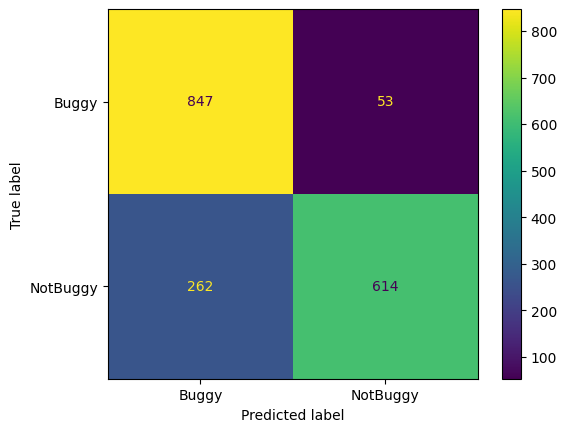

In [27]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))
cm = confusion_matrix(result["Decision"], result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

              precision    recall  f1-score   support

       Buggy       0.65      0.96      0.78       168
    NotBuggy       0.90      0.40      0.55       144

    accuracy                           0.70       312
   macro avg       0.78      0.68      0.66       312
weighted avg       0.77      0.70      0.67       312



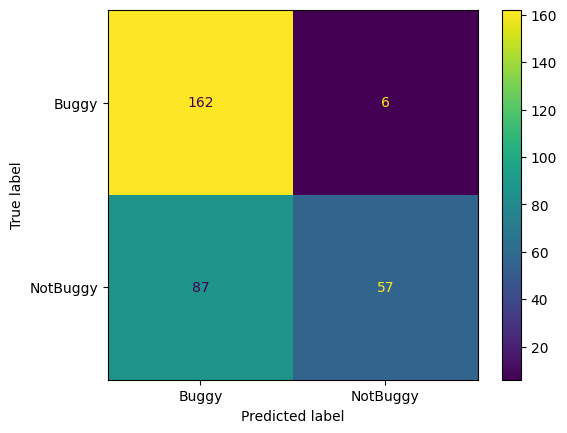

In [28]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
model_name = "gpt-4o"
result = untangler.get_batch_result("batch_67e0d7c3a0c08190be77aaa2b3ef40e2", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [ ]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [15:47,  1.87it/s]


In [ ]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.72      0.99      0.83       900
    NotBuggy       0.98      0.60      0.74       876

    accuracy                           0.79      1776
   macro avg       0.85      0.79      0.79      1776
weighted avg       0.85      0.79      0.79      1776



              precision    recall  f1-score   support

       Buggy       0.58      1.00      0.74       168
    NotBuggy       1.00      0.16      0.28       144

    accuracy                           0.61       312
   macro avg       0.79      0.58      0.51       312
weighted avg       0.77      0.61      0.52       312



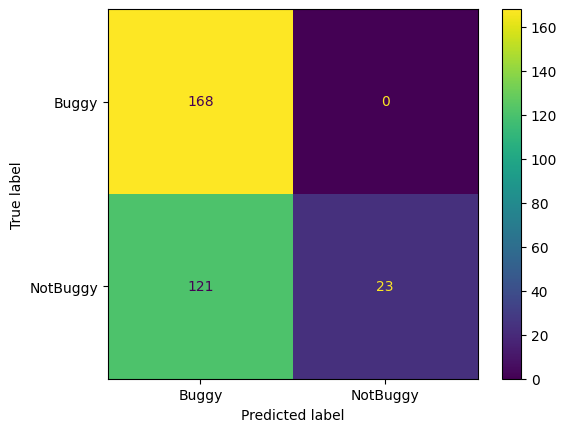

In [18]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## codellama/CodeLlama-7b-hf

In [ ]:
model_name = "microsoft/Phi-3-mini-4k-instruct"
untangler = FreeUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df[:2])
result["Detection"] = result["Detection"].apply(lambda x: x.strip())

model_name = model_name.replace("/","-")
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()